In [1]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
print('Added to PYTHONPATH')

Added to PYTHONPATH


In [3]:
from __future__ import division
from collections import defaultdict
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn.apionly as sns

# from composition.analysis.load_sim import load_sim
# import composition.analysis.plotting_functions as plotting
# from composition.analysis.effective_area import get_effective_area

import composition as comp

# Plotting-related
sns.set_palette('muted')
sns.set_color_codes()
color_dict = defaultdict()
for i, composition in enumerate(['light', 'heavy', 'total']):
    color_dict[composition] = sns.color_palette('muted').as_hex()[i]
%matplotlib inline

In [3]:
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = load_sim(return_cut_dict=True)
standard_cut_keys = ['reco_exists', 'reco_zenith', 'min_hits', 'IceTopMaxSignalInEdge',
                     'IceTopMaxSignal', 'IceTopNeighbourMaxSignal', 'StationDensity',
                     'reco_containment']
selection_mask = np.array([True] * len(df))
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

/home/jbourbeau/composition/analysis/load_sim.py:53: RuntimeWarning: divide by zero encountered in log10
  cut_dict['min_energy'] = (np.log10(df['reco_energy']) > 6.2)
/home/jbourbeau/composition/analysis/load_sim.py:57: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))
/home/jbourbeau/composition/analysis/load_sim.py:59: RuntimeWarning: invalid value encountered in log10
  np.log10(df['InIce_charge_SRTCoincPulses']))


In [4]:
eff_area, eff_area_error, energy_midpoints = get_effective_area(df, selection_mask)

Calculating effective area...


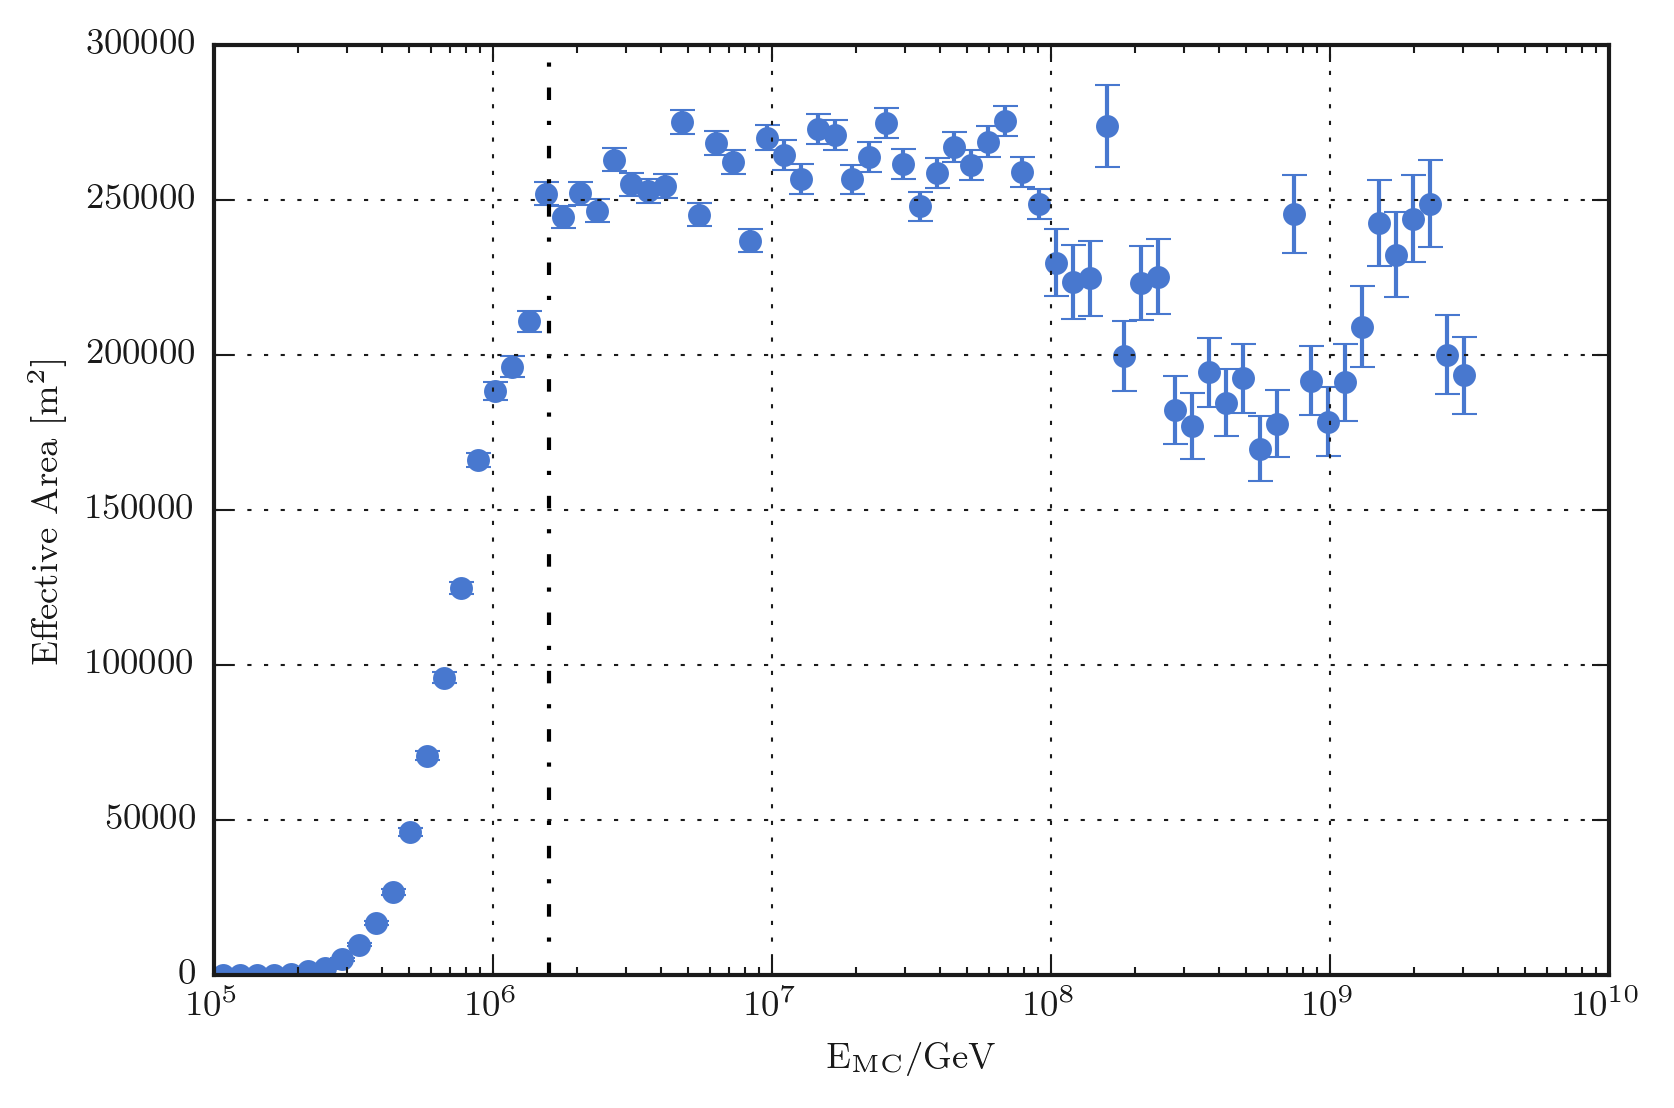

In [5]:
fig, ax = plt.subplots()
ax.errorbar(energy_midpoints, eff_area, yerr=eff_area_error, marker='.')
ax.grid()
ax.set_xscale('log')
ax.set_ylabel('$\mathrm{Effective \ Area} \ [\mathrm{m^2}]$')
ax.set_xlabel('$\mathrm{E_{MC}}/\mathrm{GeV}$')
ax.axvline(10**6.2, marker='None', linestyle='-.')
plt.show()

Calculating effective area...
Calculating effective area...
Calculating effective area...
Calculating effective area...
Calculating effective area...
Calculating effective area...
Calculating effective area...
Calculating effective area...
Calculating effective area...
Calculating effective area...


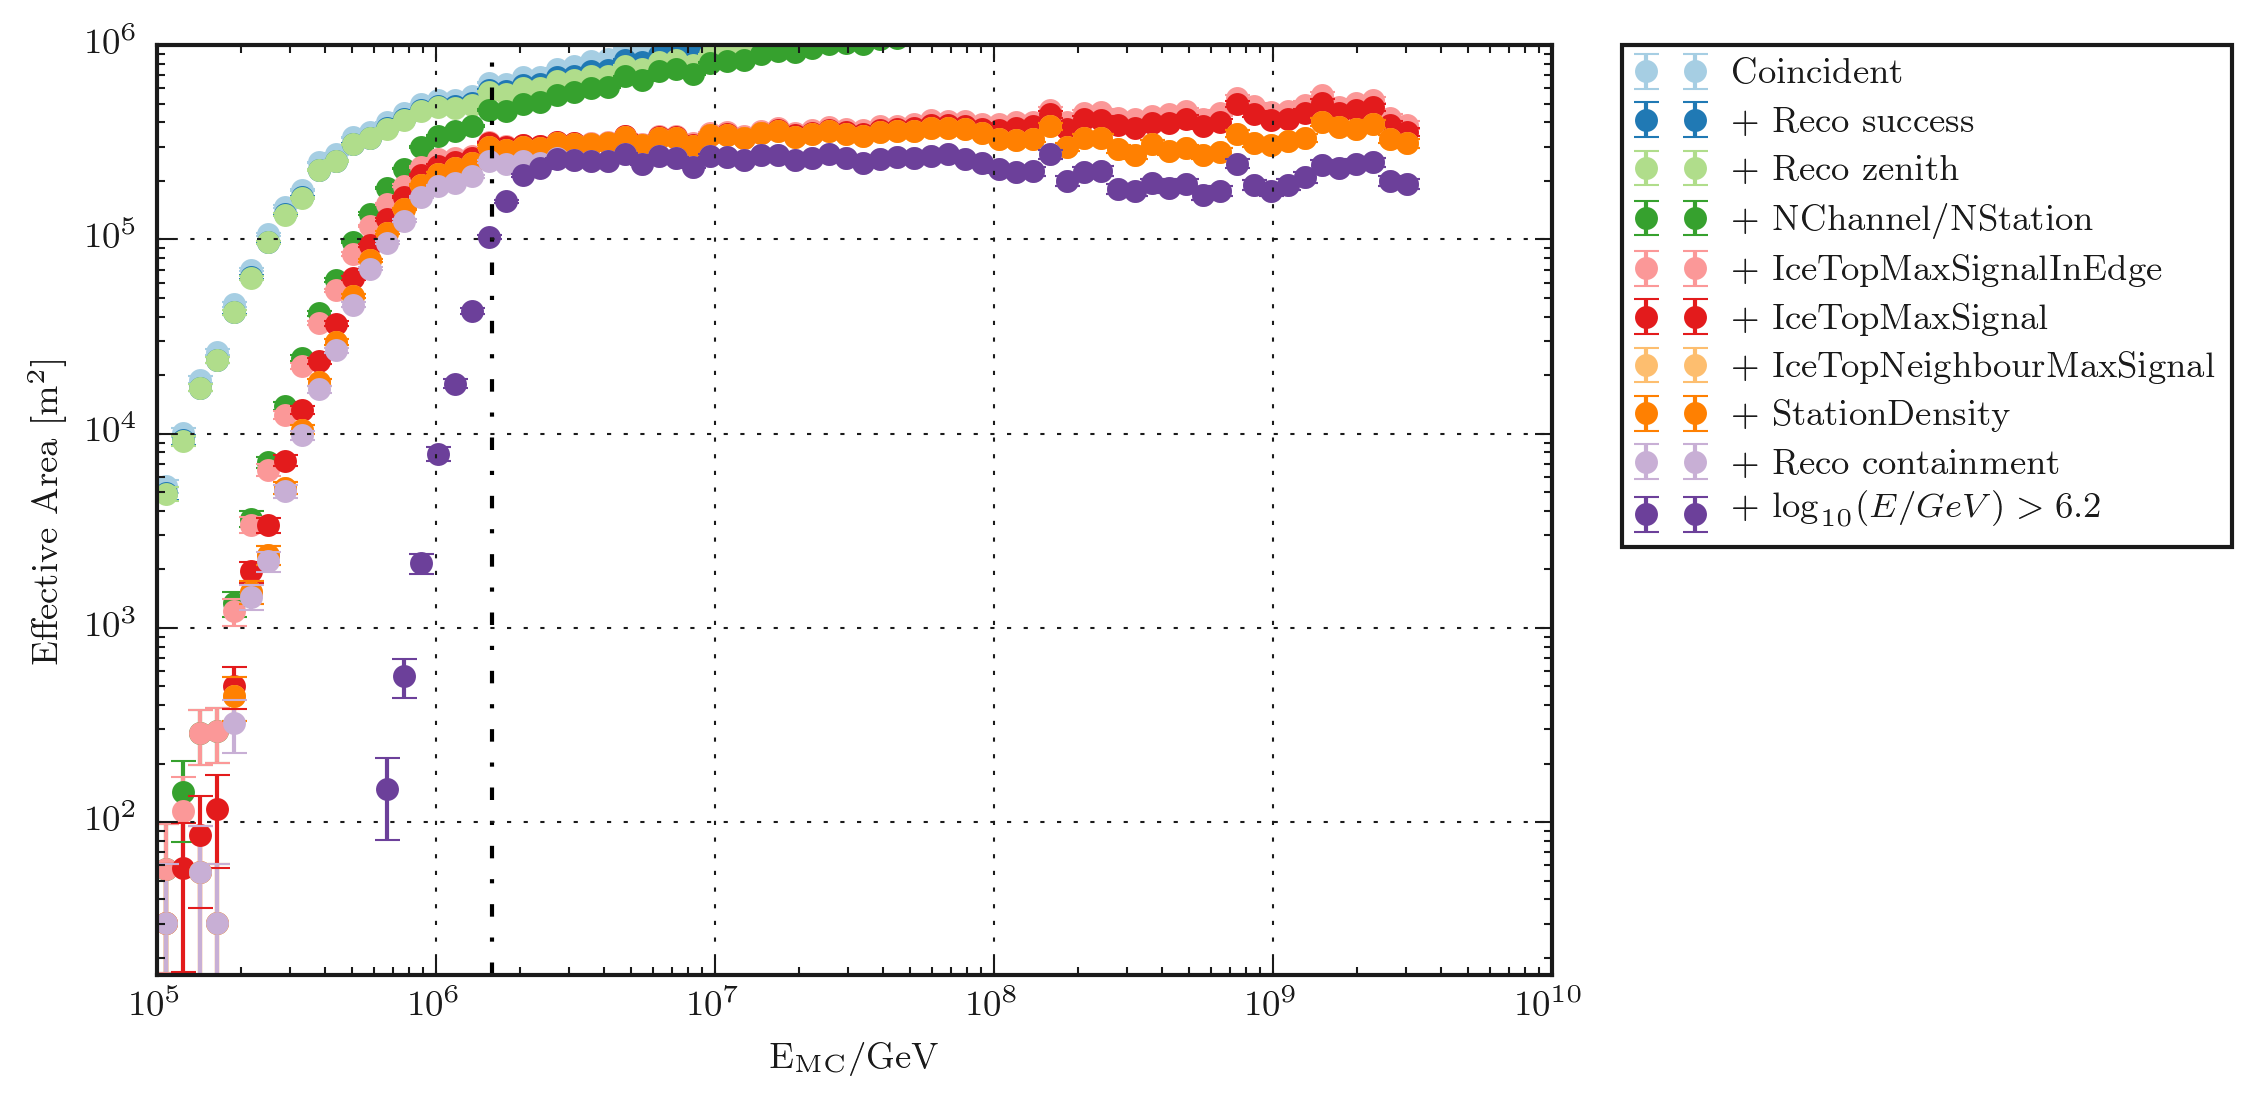

In [11]:
standard_cut_keys = ['reco_exists', 'reco_zenith', 'min_hits', 'IceTopMaxSignalInEdge', 'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
                     'StationDensity', 'reco_containment', 'min_energy']
labels = ['Reco success', 'Reco zenith', 'NChannel/NStation', 'IceTopMaxSignalInEdge', 'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
          'StationDensity', 'Reco containment', '$\log_{10}(E/GeV) > 6.2$']
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True]*len(df))
fig, ax = plt.subplots()
eff_area, eff_area_error, energy_midpoints = get_effective_area(df, selection_mask)
ax.errorbar(energy_midpoints, eff_area, yerr=eff_area_error, marker='.', label='Coincident')
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    eff_area, eff_area_error, energy_midpoints = get_effective_area(df, selection_mask)
    ax.errorbar(energy_midpoints, eff_area, yerr=eff_area_error, marker='.', label='+ {}'.format(label))
# ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
            borderaxespad=0.)
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$\mathrm{Effective \ Area} \ [\mathrm{m^2}]$')
ax.set_xlabel('$\mathrm{E_{MC}}/\mathrm{GeV}$')
ax.axvline(10**6.2, marker='None', linestyle='-.')
ax.set_ylim([0,1e6])
plt.show()